범위 : part 4. pg. 108 ~ 146 필사

# Stratified K Fold

Stratified K Fold는 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식이다. 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어 분포가 한쪽으로 치우치는 것을 의미한다.

이런 자료의 경우, K 폴드로 랜덤하게 학습 및 테스트 세트의 인덱스를 고르더라도 레이블 값인 0과 1의 비율을 제대로 반영하지 못하게 된다. 원본 데이터와 유사한 레이블 값의 분포를 학습/ 테스트 세트에도 유지하는 것이 매우 중요하다.

이를 위해 Stratified K 폴드는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배한다.

In [2]:
# K 폴드 문제 확인

import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

레이블 값은 0,1,2로 모두 50개로 동일하다. 즉, Setosa, Versicolor, Virginica 품종 모두가 50개이다.

In [3]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)
n_iter=0
for train_index, test_index in kfold.split(iris_df):
  n_iter +=1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차검증: {0}'.format(n_iter))
  print('학습 레이블 데이터분포:\n', label_train.value_counts())
  print('검증 레이블 데이터분포:\n', label_test.value_counts())

## 교차검증: 1
학습 레이블 데이터분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터분포:
 0    50
Name: label, dtype: int64
## 교차검증: 2
학습 레이블 데이터분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터분포:
 1    50
Name: label, dtype: int64
## 교차검증: 3
학습 레이블 데이터분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터분포:
 2    50
Name: label, dtype: int64


교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출되었다.

이 경우 검증 예측 정확도는 0이 될 수밖에 없다.

In [4]:
# 동일한 데이터 분할 Stratified K Fold로 수행
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter+=1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


출력 결과를 보면, 학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당되었음을 알 수 있다.

이렇게 분할이 되어야 레이블 값 0,1,2를 모두 학습할 수 있고, 이에 기반해 검증 수행이 가능하다.

In [5]:
# StratifiedKFold를 이용해 붓꽃 데이터 교차 검증
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy =[]

features= iris.data
label = iris.target


for train_index, test_index in skfold.split(features, label):
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  dt_clf.fit(X_train, y_train)
  pred= dt_clf.predict(X_test)

  # 반복 시마다 정확도 측정
  n_iter +=1
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 : {1},학습데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

  # 교차 검증별 정확도 및 평균 정확도 계산
  print('\n## 교차 검증별 정확도:', np.round(cv_accuracy,4))
  print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.98,학습데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

## 교차 검증별 정확도: [0.98]
## 평균 검증 정확도: 0.98

#2 교차 검증 정확도 : 0.94,학습데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

## 교차 검증별 정확도: [0.98 0.94]
## 평균 검증 정확도: 0.96

#3 교차 검증 정확도 : 0.98,학습데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


평균 검증 정확도가 96.67%로 측정되었다.

왜곡된 레이블 데이터 세트에서는 반드시 Stratified K Fold를 이용해 교차검증 해야하며, 일반적으로 분류에서의 교차 검증은 Stratified K Fold로 분할되어야 한다.

## 교차 검증을 간편하게 : cross_val_socre()

**KFold로 데이터를 학습하고 예측하는 코드**

1) 폴드 세트를 설정

2) for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출

3) 반복적으로 학습과 예측 수행, 예측 성능 반환

**cross_val_score()**

cross_val_score(estimator, X, y= None, scoring = None, cv= None, n_jobs =1, verbose=0, fit_params= None, pre_dispatch''2*n_jobs')

estimator :  Classifier 혹은 Regressior

scoring : 예측 성능 평가 지표

cv : 교차 검증 폴드 수

scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환한다.

In [6]:
# 교차검증 폴드 수 3, 성능 평가 지표 : accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data
label = iris_data.target

scores= cross_val_score(dt_clf, data, label, scoring ='accuracy', cv=3)
print('교차 검증별 정확도: ', np.round(scores, 4))
print('평균 검증 정확도: ', np.round(np.mean(scores),4))

교차 검증별 정확도:  [0.98 0.94 0.98]
평균 검증 정확도:  0.9667


cross_val_score가 내부적으로 StratifiedKFold를 이용한다.


비슷한 API : cross_validate()

여러 개의 평가 지표 반환 가능, 성능 평가 지표와 수행시간 함께 제공

## GridSearchCV

교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에

In [7]:
grid_parameters= {'max_depth' : [1,2,3],
                  'min_sampels_split':[2,3]}

이 경우 max_depth=1일때 min_samples_split 2,3 -> ...이런식으로 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행하며 최적의 파라미터와 수행 결과 도출 가능

**GridSearchCV는 교차검증을 기반으로 하이퍼 파라미처의 최적값을 찾게 해준다.**

즉, 데이터세트를 cross-validation을 위한 학습/ 테스트 세트로 자동으로 분할한 뒤 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 해준다.

단, 수행시간이 상대적으로 오래 걸림

** 주요 파라미터 **

estimator : classifier, regressor

param_grid : 키 + 리스트 값을 가지는 딕셔너리

scoring : 예측 성능을 측정할 평가 방법 지정

cv : 교차 검증을 위해 분할되는 학습/ 테스트 세트의 개수 지정

refit : 디폴트가 True, 최적의 하이퍼 파라미처를 찾은 뒤 입력된 estimator 객체를 해당 파라미터로 재학습

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# 데이터 로딩
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

## 파라미처를 딕셔너리 형태로 설정
parameters= {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [9]:
grid_dtree = GridSearchCV(dtree, param_grid= parameters, cv=3, refit=True)
grid_dtree.fit(X_train, y_train)
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


총 6개의 결과가 나타난다. 5번째, 6번째의 경우가 성능 1위이다.

1) params : 수행마다 적용된 개별 하이퍼 파라미터 값

2) rank_test_score : 성능이 좋은 score 순위

3) mean_test_socre : 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균

In [10]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [11]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적학습이 완료
pred= estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


일반적으로 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미처 튜닝을 수행한 후 별도의 테스트 세트에서 이를 평가하는 것이 머신러닝 모델 적용 방법이다.

# 5. 데이터 전처리

기본사항

1) 결손값은 허용되지 않는다. 대체하거나 / 드롭해야함.

2) 문자열 값을 입력값으로 허용하지 않는다.
모든 문자열 값은 인코딩하여 숫자형으로 변환이 필요

## 데이터 인코딩

### 레이블 인코딩 (Label Encoding)

카테고리 피쳐를 코드형 숫자 값으로 변환하는 것이다. LabelEncoder 클래스로 구현한다.

In [12]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder= LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [13]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [14]:
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


레이블 인코딩이 일괄적인 숫자 값으로 변환되며 예측 성능이 떨어질 수 있다. 이는 숫자값의 크고 작음에 대한 특성이 작용하기 때ㅐ문이다. 이 때문에 레이블 인코딩은 선형회귀같은 알고리즘에는 적용하지 않아야하고, 트리계열은 상관없다.

### 원핫인코딩 (One-Hot Encoding)

OneHotEncoder 클래스 이용.

1) 변환 전에 모든 문자열 값이 숫자형 값으로 변환되어야 함

2) 입력 값으로 2차원 데이터가 필요

In [15]:
from sklearn.preprocessing import OneHotEncoder
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자값으로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환
labels = labels.reshape(-1,1)

# 원핫 인코딩을 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원핫 인코딩 데이터')
print(oh_labels.toarray())
print('원핫 인코딩 데이터 차원')
print(oh_labels.shape)

원핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원핫 인코딩 데이터 차원
(8, 6)


get_dummies() 이용 가능!

In [16]:
df= pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


숫자형 값으로 변환 없이도 바로 변환 가능하다.

## 피처 스케일링과 정규화

### 피처 스케일링

서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업

**표준화** : 데이터의 피처 각각이 평균 0이고, 분산 1인 가우시안 정규 분포를 가진 값으로 변환하는 것.

x_new = (x - mean(x))/ std(x)

**정규화** : 서로 다른 피처 크기를 통일하기 위해 크기를 변환, 값을 모두 최소 0 ~ 최대 1로 변환하여 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것.

x_new = (x-min(x))/ (max(x) - min(x))

단, 사이킷런의 Normalizer 모듈은 선형대수에서의 정규화 개념이 적용되었다.

이를 앞으로 벡터 정규화로 지칭

### StandardScaler

표준화를 쉽게 지원하기 위한 클래스, 즉 개별 피처를 평균이 0이고 분산이 1인 값으로 변환


-> SVM, 선형회귀, 로지스틱 회귀

In [17]:
from sklearn.datasets import load_iris
iris= load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data= iris_data, columns=iris.feature_names)

print('feature들의 평균값')
print(iris_df.mean())
print('\nfeature들의 분산값')
print(iris_df.var())

feature들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [18]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data= iris_scaled, columns= iris.feature_names)
print('feature 들의 평균값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산값')
print(iris_df_scaled.var())

feature 들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled=pd.DataFrame(data = iris_scaled, columns= iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


모든 피처에서 0에서 1의 사이값으로 변환되는 스케일링이 적용되었다.

### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

데이터의 스케일링 변환 시 fit(), transform(), fit_transform() 메소드를 이용한다.

학습데이터 세트로 fit()과 transform()을 적용하면, 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 해야한다.

테스트 데이터에 fit() 적용할 때 발생하는 문제를 알아보자

In [20]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

# MinMaxScaler 객체에 별도의 feature_range 파라미터 값 지정 X
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10
scaler.fit(train_array)

# transform() 호출로 1/10 scale로 학습데이터 변환
train_scaled = scaler.transform(train_array)

print('원본 :', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [21]:
# 테스트 데이터 변환
# fit() 호출로 스케일링 기준 정보 다시 적용 후 transform() 수행
# MinMaxScaler()에 test_array를 fit하면 원본데이터의 최솟값 0, 최댓값 5
scaler.fit(test_array)

# 1/5 scale로 변환
test_scaled= scaler.transform(test_array)

# test_array의 scale 변환 출력
print('원본 데이터 : ',np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터: ', np.round(test_scaled.reshape(-1),2))

원본 데이터 :  [0 1 2 3 4 5]
Scale된 test_array 데이터:  [0.  0.2 0.4 0.6 0.8 1. ]


출력결과, 테스트데이터는 최솟값 0 최댓값 5로 1/5로 스케일링되지만, 학습 데이터는 1/10으로 스케일링되어 서로 다른 원본값이 동일한 값으로 변환되는 결과를 초래하게 되었다.

머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 하며, 테스트 데이터의 1값을 학습 데이터와 동일하게 0.1 값으로 변환되어야 한다.

따라서 테스트 데이터에 다시 fit()을 적용해선 안되며 학습데이터로 이미 fit()이 적용된 scaler 객체를 이용해 transform()으로 변환해야 한다.

In [24]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

# test_array에 Sacle 변환을 할 때는 반드시 fit() 호출 X, transform()만으로 변환해야함
test_scaled= scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


fit_transform() 을 적용할 때도 마찬가지이다.

fit_transform()은 fit()과 transform()을 순차적으로 수행하는 메소드이므로 테스트 데이터에서는 절대 사용해서는 안된다.

**먼저 전체 데이터에 스케일링을 적용한 후 학습과 테스트 데이터 세트로 분리하는 것이 바람직**

# 사이킷런으로 수행하는 타이타닉 생존자 예측

In [25]:
# 패키지 임포트

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
# drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
titanic_df= pd.read_csv("/content/drive/MyDrive/데이터/titanic.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [28]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [30]:
# 결측치 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isna().sum().sum())

데이터 세트 Null 값 개수 0


In [31]:
# 문자열 피처 값 분류
print('Sex 값 분포: \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포: \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포: \n', titanic_df['Embarked'].value_counts())

Sex 값 분포: 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포: 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Cabin의 속성값이 잘 정리되지 않아보임. 앞문자만 추출해 해결

In [32]:
titanic_df['Cabin']= titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [33]:
# 성별에 따른 생존자 수 비교
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

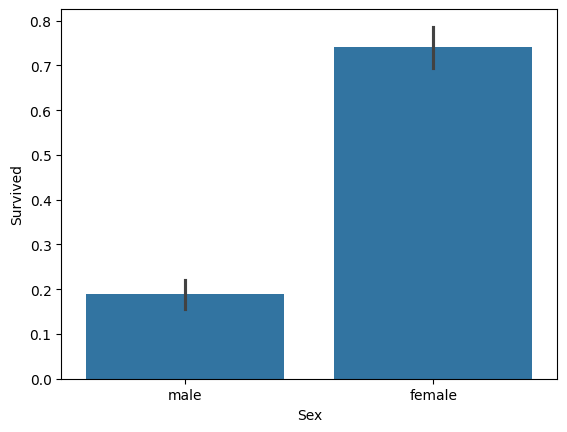

In [34]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

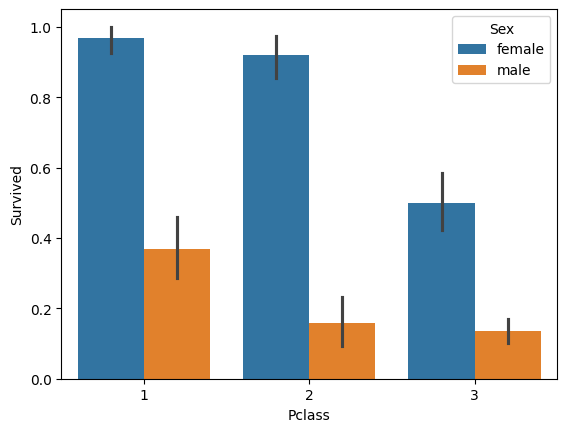

In [35]:
# 객실 등급에 따른 생존 차이
sns.barplot(x='Pclass', y='Survived', hue='Sex', data = titanic_df)

여성은 삼등실에서 생존 확률이 상대적으로 많이 떨어졌으며, 남성은 일등실의 생존 확률이 월등히 높다.

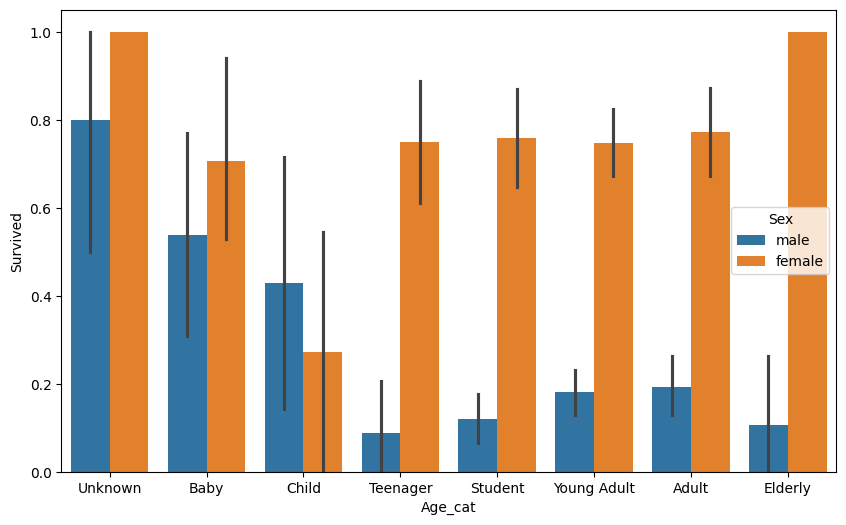

In [37]:
# age에 따른 생존 확률
# 범위별로 분류하자

def get_category(age):
  cat=''
  if age<=1 : cat='Unknown'
  elif age<=5 : cat = 'Baby'
  elif age<= 12 : cat='Child'
  elif age<= 18 : cat='Teenager'
  elif age <= 25: cat='Student'
  elif age<=35: cat='Young Adult'
  elif age<=60 : cat = 'Adult'
  else : cat= 'Elderly'

  return cat


plt.figure(figsize=(10,6))

# X축 값 순차적으로 표시하기 위해
group_names=['Unknown', 'Baby', 'Child', 'Teenager','Student','Young Adult', 'Adult','Elderly']

titanic_df['Age_cat']= titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

이제 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환하자

In [38]:
from sklearn import preprocessing

def encode_features(dataDF):
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le= preprocessing.LabelEncoder()
    le=le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF


titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [47]:
# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin']= df['Cabin'].str[:1]
  features = ['Cabin', 'Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le= le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df= fillna(df)
  df= drop_features(df)
  df = format_features(df)
  return df

# 원본 데이터를 재로딩하고 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv("/content/drive/MyDrive/데이터/titanic.csv")
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
# DT, RF, 로지스틱 회귀를 위한 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred= dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 랜덤포레스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 로지스틱회귀 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('Logistic 회귀 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도 : 0.8547
Logistic 회귀 정확도 : 0.8492


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  kfold = KFold(n_splits=folds)
  scores=[]

  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도: {1: 4f}'.format(iter_count, accuracy))

  mean_score = np.mean(scores)
  print('평균 정확도: {0:.4f}'.format(mean_score))

exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도:  0.754190
교차 검증 1 정확도:  0.780899
교차 검증 2 정확도:  0.786517
교차 검증 3 정확도:  0.769663
교차 검증 4 정확도:  0.820225
평균 정확도: 0.7823


In [52]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도: 0.7879


In [54]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
              'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid= parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DTClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.7992
테스트 세트에서의 DTClassifier 정확도: 0.8715


하이퍼 파라미터 튜닝 이후 정확도가 향상되었다.